In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project


'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
len(stopwords)

179

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(corpus)

723

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 10 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT WITH CUSTOM STOPWORDS APPLIED
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
714           learning  0.022896
626              image  0.022333
875            network  0.018623
1072            python  0.017240
882             neural  0.016779
630             images  0.016316
50            analysis  0.015929
39           algorithm  0.015651
1363           trained  0.015488
1346              time  0.014946
726               like  0.014819
10            accuracy  0.014608
488           features  0.014597
57             android  0.014112
69                 app  0.014023
756            machine  0.013823
40          algorithms  0.013622
818             models  0.013613
209     classification  0.013025
335               deep  0.012654
704           language  0.012272
883     neural network  0.011697
757   machine learning  0.011328
1220               set  0.011235
1336              text  0.010888
336      deep learning  0.010564
1056        processing  0.010457
1449           website  0.009597
231                cnn  0.009528
484            feature  0.009353

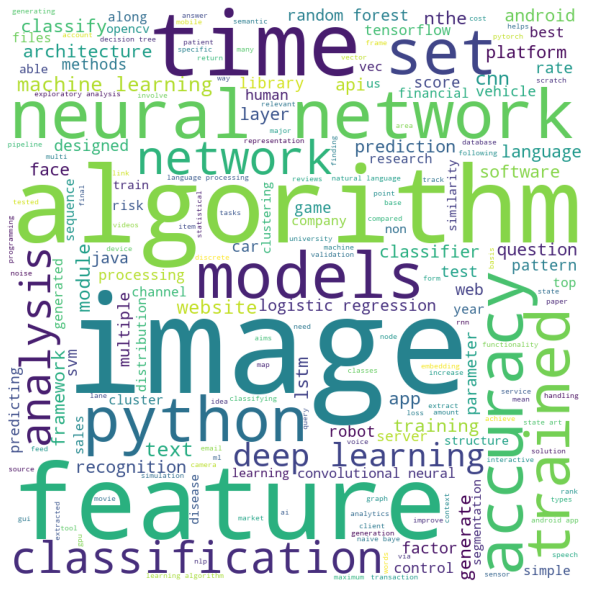

In [ ]:
new_corpus_customsp1 = ' '.join(new_corpus_customsp)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(new_corpus_customsp1) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 3,
    max_df = 0.7,
    max_features = None,
    stop_words = 'english'
)
tfidf.fit(new_corpus_customsp)
x = tfidf.transform(new_corpus_customsp)
x


<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


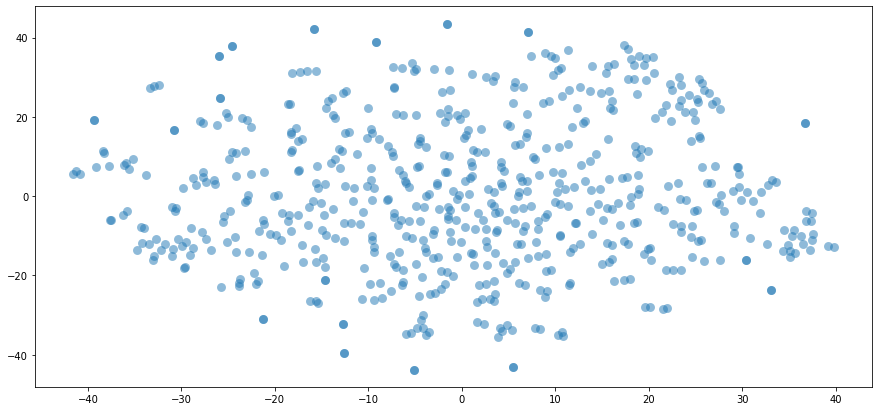

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(x, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


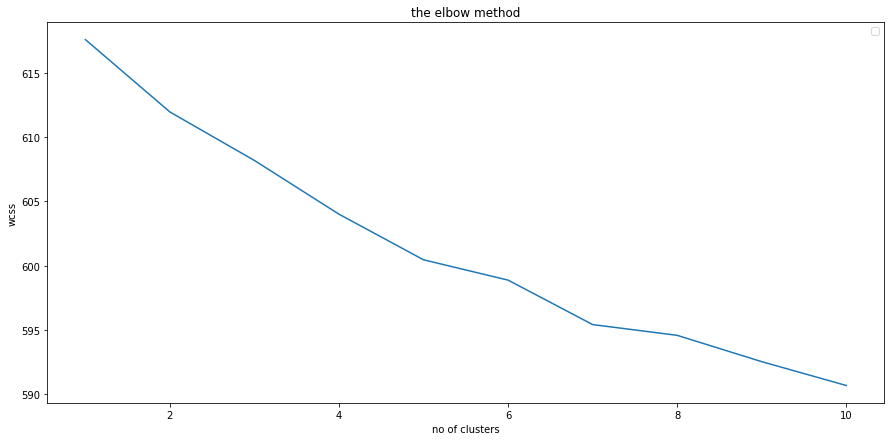

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[4 6 6 6 4 8 1 7 5 5 6 9 5 0 6 7 1 1 9 1 9 1 9 1 5 1 1 1 8 9 4 8 0 2 7 6 6
 6 2 1 6 8 8 5 5 0 8 4 6 2 4 4 4 6 6 0 1 2 8 8 2 4 1 6 0 5 3 3 6 6 6 6 8 6
 1 6 0 0 4 2 9 5 8 8 8 1 6 6 1 5 0 2 6 4 6 1 1 1 6 7 8 5 6 6 2 1 6 6 0 7 1
 6 1 9 2 4 3 6 6 4 6 8 8 6 5 9 0 9 7 7 4 0 5 4 2 4 5 1 5 6 0 6 1 0 7 6 5 4
 6 0 6 9 6 1 4 4 6 4 6 1 5 0 4 8 5 5 0 2 6 2 8 6 3 3 3 3 7 5 3 0 7 5 3 0 7
 0 5 4 5 0 6 1 6 6 6 5 8 6 1 5 6 2 8 4 1 4 6 6 6 6 2 4 1 0 4 1 6 8 8 8 3 6
 4 6 5 4 8 5 8 0 1 8 6 1 6 6 0 4 7 3 9 8 7 6 9 7 5 9 4 6 9 6 7 3 3 4 7 5 4
 8 4 5 1 6 6 9 6 5 8 5 3 0 6 8 5 2 4 5 8 1 0 9 4 4 8 6 8 8 8 9 5 2 6 4 4 4
 6 5 7 5 3 3 6 9 4 9 5 9 6 6 6 9 9 0 9 4 7 4 6 3 8 6 9 5 3 3 8 9 5 5 8 3 4
 3 0 7 6 6 6 6 2 8 5 8 6 5 4 8 0 0 2 2 8 2 6 6 9 5 8 8 8 4 4 8 1 6 2 4 4 3
 5 6 6 1 4 8 8 6 5 5 7 4 3 6 6 8 5 6 6 9 9 6 6 6 6 6 8 0 6 1 8 4 2 2 5 6 0
 6 6 5 6 6 0 3 6 6 1 6 6 9 1 6 0 1 8 1 3 6 6 4 5 7 6 0 5 8 8 0 5 9 7 6 6 9
 3 2 6 6 6 1 6 1 6 6 7 4 8 7 1 6 7 6 9 5 6 3 4 2 0 4 6 2 3 1 3 6 6 6 6 8 6
 1 1 6 4 6 5 1 6 6 6 6 7 

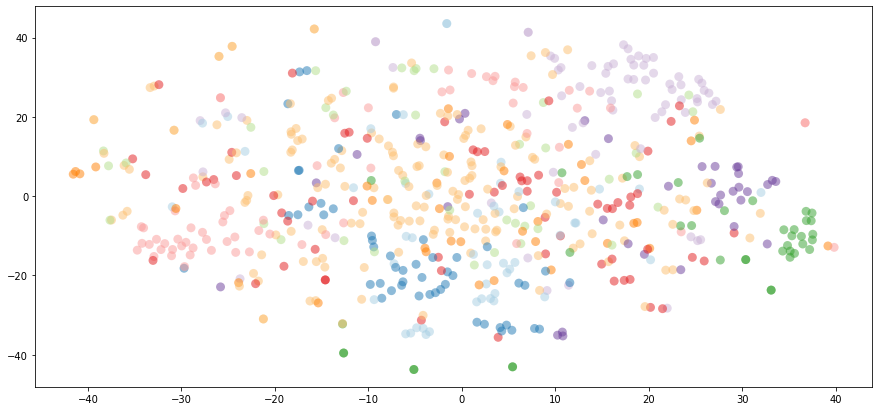

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(x) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(x, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.00419232319915647
For no of clusters = 3  The average silhouette_score is : 0.005465215256090196
For no of clusters = 4  The average silhouette_score is : 0.006757312176059014
For no of clusters = 5  The average silhouette_score is : 0.00723808972083562
For no of clusters = 6  The average silhouette_score is : 0.008484528980993613
For no of clusters = 7  The average silhouette_score is : 0.008177179972005788
For no of clusters = 8  The average silhouette_score is : 0.008656440111022252
For no of clusters = 9  The average silhouette_score is : 0.00979381003477855
For no of clusters = 10  The average silhouette_score is : 0.009772457206892007


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

48

In [ ]:
#projects in cluster 1
list1

['autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'algorithmic models execute back test piotroskis score trading strategy indian markets period nand compound annual growth rate cagr accrual earnings anomaly trading strategy indian scenario cagr back testing tested momentum trading strategy indian market periods got annual return prowessiq prowessdx querying cmie database performances listed strategies python',
 'analysis naphtha cracking obtained haldia petrochemical dimensionality reduction pca digital analog naphtha cracking processand suggested installation monitoring sensors c

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
34                 sales  0.106897
27            parameters  0.103772
15                  like  0.068261
12                   gui  0.065028
5               analysis  0.059810
14                indian  0.057198
20              modeling  0.055723
10         functionality  0.051958
31           recognition  0.050484
43                  time  0.049569
8                detects  0.044858
4             algorithms  0.044843
17             marketing  0.043432
3              algorithm  0.040735
7                 cities  0.036831
35                   sas  0.036634
40            strategies  0.036350
26                   net  0.035645
32            regression  0.033831
1               accurate  0.033786
11                future  0.032669
39                stores  0.031674
28            predicting  0.030293
36                   set  0.029149
13            identified  0.028219
30  preparation modeling  0.026249
29           preparation  0.026249
23         modeling tool  0.026249
25     ndata preparation  0.026249
24                 ndata  0.026249
44                  tool  0.026249
16                linear  0.025070
9              financial  0.025060
0               accuracy  0.021895
6                   best  0.021349
42               testing  0.020289
38                 store  0.019129
33               returns  0.018668
45              tool sas  0.015550
2             activities  0.014493

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of autonomous is : 2
Frequency of humanoid is : 2
Frequency of agents is : 2
Frequency of playing is : 1
Frequency of soccer is : 2
Frequency of intelligently is : 1
Frequency of simulated is : 1
Frequency of nenvironment is : 1
Frequency of following is : 1
Frequency of physics is : 1
Frequency of rule is : 2
Frequency of optimized is : 2
Frequency of like is : 9
Frequency of walking is : 1
Frequency of kicking is : 1
Frequency of factor is : 1
Frequency of x is : 1
Frequency of evolutionary is : 1
Frequency of strategies is : 4
Frequency of cma is : 1
Frequency of es is : 1
Frequency of ever is : 2
Frequency of simspark is : 1
Frequency of gym is : 1
Frequency of openai is : 1
Frequency of rl is : 1
Frequency of nalgorithms is : 1
Frequency of trpo is : 1
Frequency of ddpg is : 1
Frequency of optimize is : 2
Frequency of passing is : 2
Frequency of dodging is : 1
Frequency of defense is : 1
Frequency of positioning is : 1
Frequency of modules is : 2
Frequency of voronoi is 

In [ ]:
list10

'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition algorithmic models execute back test piotroskis score trading strategy indian markets period nand compound annual growth rate cagr accrual earnings anomaly trading strategy indian scenario cagr back testing tested momentum trading strategy indian market periods got annual return prowessiq prowessdx querying cmie database performances listed strategies python analysis naphtha cracking obtained haldia petrochemical dimensionality reduction pca digital analog naphtha cracking processand suggested installation monitoring sensors collection

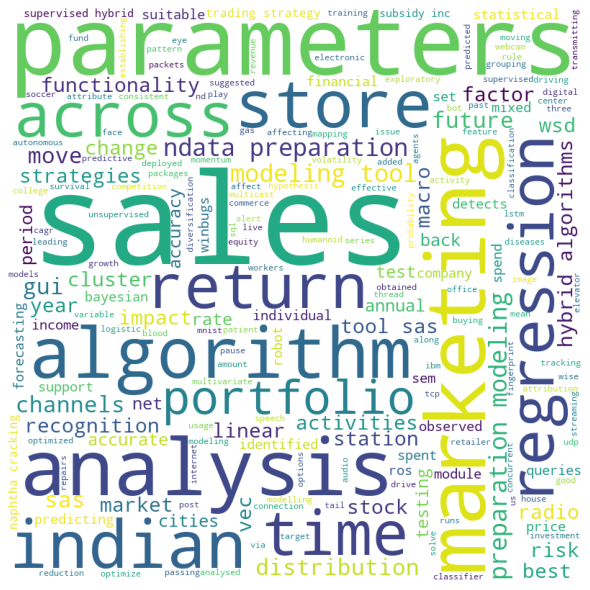

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

52

In [ ]:
list2

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca feature engineering achieving much accuracy',
 'credit risk validation engagements aimed making banks basel ii compliant engagements broken preparation stage validation stage preparation step included creation list co ordination client get ensure correctness validation stage included validation',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
0                accuracy  0.075743
87             regression  0.075066
84                 random  0.068759
2              algorithms  0.066846
94                    set  0.064935
35               features  0.063278
4                analysis  0.062836
40                 forest  0.060219
85          random forest  0.060219
53    logistic regression  0.058207
52               logistic  0.058207
78             prediction  0.057552
17                company  0.053829
61                 models  0.053750
22               decision  0.049266
111            validation  0.048337
32                feature  0.046199
81                 python  0.044801
11                  churn  0.042689
13             classifier  0.041472
99                    svm  0.041333
77             predicting  0.041033
23          decision tree  0.040994
107                  tree  0.040994
48                   like  0.040669
15               cleaning  0.038985
60              modelling  0.036639
29            exploratory  0.035716
30   exploratory analysis  0.035716
18                 credit  0.035709

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 4
Frequency of predictive is : 2
Frequency of models is : 15
Frequency of risk is : 5
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 1
Frequency of generate is : 2
Frequency of tagging is : 2
Frequency of churned is : 2
Frequency of service is : 2
Frequency of usage is : 1
Frequency of also is : 2
Frequency of strong is : 1
Frequency of email is : 2
Frequency of address is : 1
Frequency of tracked is : 1
Frequency of many is : 1
Frequency of teams is : 2
Frequency of often is : 1
Frequency of cause is : 1
Frequency of delay is : 1
Frequency of assigned is : 1
Frequency of wrong is : 1
Frequency of manually is : 1
Frequency of assigning is : 1
Frequency of sophisticated is : 1
Frequency of text is : 4
Frequency of mining is : 4
Frequency of pipeline is : 3
Frequency of python is : 12
Frequency of rapidminer is : 1
Freque

In [ ]:
list20

'leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca feature engineering achieving much accuracy credit risk validation engagements aimed making banks basel ii compliant engagements broken preparation stage validation stage preparation step included creation list co ordination client get ensure correctness validation stage included validation top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accuracy independent f

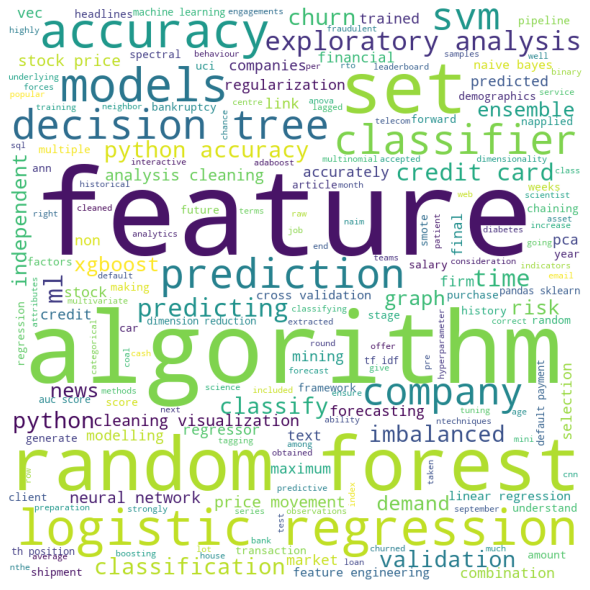

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

40

In [ ]:
list3

['scraping module extract disease web newspapers last years instituted unsupervised classifier sentiment analyser categorize articles types effect reader temporal regional analysis extracted analyze progress suggest modification nhiv eradication campaign',
 'analyst collects thousands points sources initiated automate advance natural language processing segmentation classification association extract past collected analysts training improve accuracy',
 'semi supervised graph link prediction derivational nouns english web scraping algorithms scrape derivational nouns wiktionary generate edge weights morphological semantic similarity shared nouns gcn graph semi supervised methods link prediction words',
 'stanford segmenter chinese segmentation simple edit distance erroneous words vocabulary select minimum edit distance correction',
 'indiana university columbia asia chest x ray reports training dbscan k means clustering finding similarity sentences bert paper generating reports secondly

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
27      similarity  0.127619
30         trained  0.126302
15            loss  0.086404
23       questions  0.080306
29            time  0.073418
19        networks  0.071799
18         network  0.068257
26         similar  0.062488
11            form  0.062041
8          extract  0.055444
13            java  0.052397
10         finding  0.049221
7         distance  0.048337
12           image  0.046317
14           learn  0.041869
25           score  0.041252
0       algorithms  0.041078
28            text  0.040861
24    relationship  0.039452
9          feature  0.039224
3          average  0.038205
16         methods  0.037554
6       clustering  0.036553
17          metric  0.036329
22      predicting  0.034832
33         weights  0.034669
32             web  0.032377
21            pair  0.030572
34           words  0.028982
5   classification  0.028457

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of scraping is : 2
Frequency of module is : 2
Frequency of extract is : 4
Frequency of disease is : 1
Frequency of web is : 3
Frequency of newspapers is : 2
Frequency of last is : 1
Frequency of years is : 1
Frequency of instituted is : 1
Frequency of unsupervised is : 1
Frequency of classifier is : 2
Frequency of sentiment is : 1
Frequency of analyser is : 1
Frequency of categorize is : 1
Frequency of articles is : 1
Frequency of types is : 1
Frequency of effect is : 1
Frequency of reader is : 1
Frequency of temporal is : 1
Frequency of regional is : 1
Frequency of analysis is : 3
Frequency of extracted is : 2
Frequency of analyze is : 1
Frequency of progress is : 1
Frequency of suggest is : 2
Frequency of modification is : 1
Frequency of nhiv is : 1
Frequency of eradication is : 1
Frequency of campaign is : 1
Frequency of analyst is : 1
Frequency of collects is : 1
Frequency of thousands is : 2
Frequency of points is : 1
Frequency of sources is : 1
Frequency of initiated is

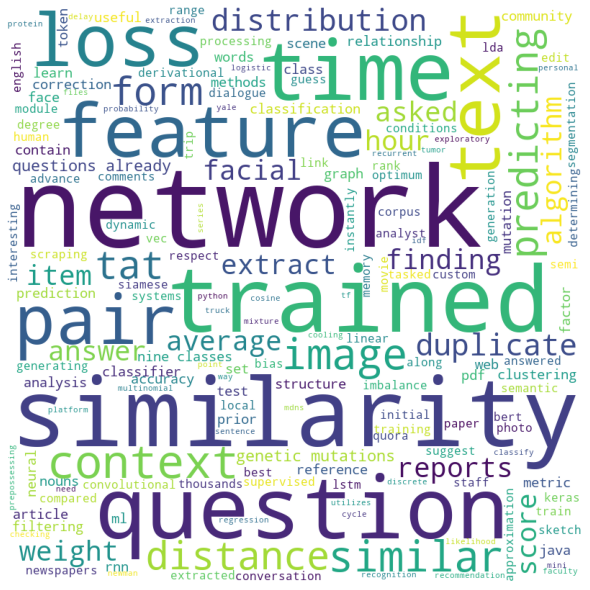

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

40

In [ ]:
list4

['android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'uf fc time streaming shot remote control robot vr format android uf fc robot controlled mobile uf fc finalist yantra yantra ideas competition iit bombay uf fc presented anveshan',
 'android app guides visually impaired recognizing objects smartphone camera time app text speech give objects detected class recognizes human faces attributes like age gender emotion app also recognizes text image ntools ssd mobi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2          android  0.201859
52            time  0.102347
5              api  0.073053
3      android app  0.070984
31          module  0.067079
17        features  0.056948
23           helps  0.053932
13          degree  0.051980
14         disease  0.048872
30          mobile  0.044615
36          neural  0.043876
29            maps  0.043697
45           robot  0.043657
35         network  0.043303
39           nthis  0.041348
42           phone  0.040974
10     competition  0.040900
0         advanced  0.037976
51       streaming  0.037170
15          driver  0.036303
11         control  0.035951
37  neural network  0.035056
16         driving  0.034058
1        algorithm  0.033884
24             iit  0.032500
28            like  0.032476
53    transmission  0.031427
27            java  0.030848
12        database  0.030352
25           image  0.029947

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of android is : 42
Frequency of app is : 46
Frequency of driving is : 6
Frequency of collecting is : 2
Frequency of smart is : 3
Frequency of phone is : 6
Frequency of sensors is : 2
Frequency of like is : 5
Frequency of accelerometer is : 2
Frequency of gps is : 3
Frequency of gyroscope is : 2
Frequency of unsafe is : 2
Frequency of harsh is : 2
Frequency of k is : 3
Frequency of means is : 2
Frequency of clustering is : 3
Frequency of algorithm is : 4
Frequency of found is : 3
Frequency of thresholds is : 4
Frequency of events is : 4
Frequency of brake is : 2
Frequency of acceleration is : 2
Frequency of left is : 2
Frequency of turn is : 4
Frequency of right is : 2
Frequency of separate is : 2
Frequency of automata is : 4
Frequency of time is : 19
Frequency of basis is : 3
Frequency of accuracy is : 2
Frequency of around is : 2
Frequency of studio is : 2
Frequency of java is : 4
Frequency of uf is : 4
Frequency of fc is : 4
Frequency of streaming is : 6
Frequency of shot i

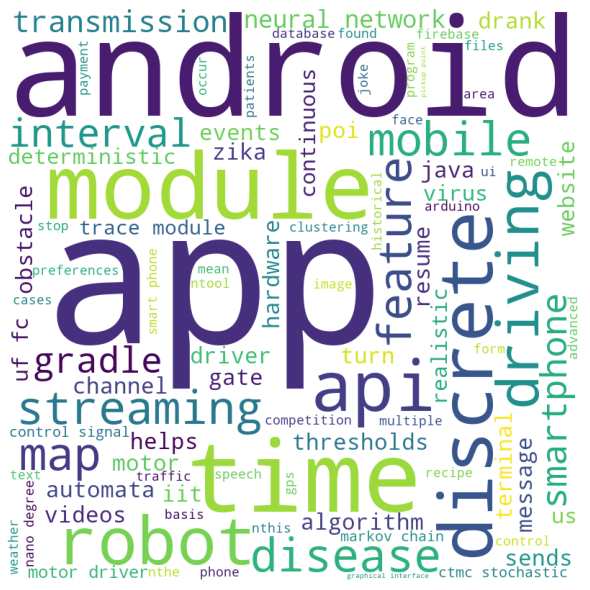

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

68

In [ ]:
list5

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclusive vectors relations extracted like conceptnet numberbatch nresearch areas natural language processing machine learning',
 'novel emotions like happy sad angry textual conversations na tree lstm deep learning variation tree lstm behavior negative posi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
46              machine  0.130385
47     machine learning  0.115896
21        deep learning  0.101187
20                 deep  0.100549
3             algorithm  0.053551
13       classification  0.052788
42                 like  0.050032
93             training  0.046776
4            algorithms  0.046169
33                image  0.039255
5              analysis  0.037701
90                 time  0.035175
50               models  0.034114
58              network  0.033751
60               neural  0.033062
17                  cnn  0.031885
27             features  0.031169
80             relevant  0.031071
16           clustering  0.029335
92              trained  0.028934
77          recognition  0.028558
0              accuracy  0.028287
38   learning algorithm  0.028067
89                 text  0.028028
87                tasks  0.027571
85           supervised  0.027328
30                  gpu  0.026372
36             language  0.025999
39  learning algorithms  0.025947
74                 rank  0.025016

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 1
Frequency of faces is : 2
Frequency of major is : 1
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 15
Frequency of complexity is : 1
Frequency of means is : 1
Frequency of time is : 8
Frequency of get is : 5
Frequency of answer is : 3
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 2
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 1
Frequency of achieve is : 4
Frequency of tradeoff is : 1
Frequency of precision is : 1
Frequency of recall is : 1
Frequency of improves is : 1
Frequency of score is : 2
Frequency of machine is : 40
Frequency of learning is : 93
Frequency of collecting is : 1
Frequency of training is : 10
Frequency of side is : 1
Frequency of simple is : 3
Frequency of interface is : 1
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 1
Frequency

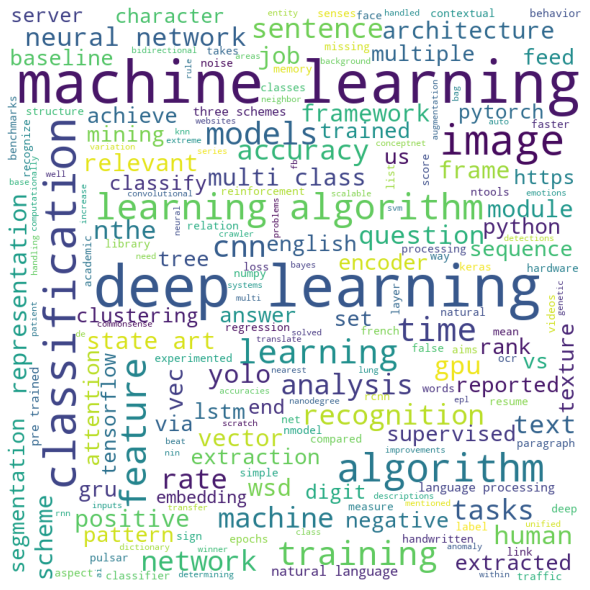

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

65

In [ ]:
list6

['algorithm dynamic maze moving obstacles path source destination',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'clustering categorise countries socio economic health factors finding countries need focus prepared cleaned adequate along treating outliers silhouette score elbow optimal clusters assign countries cluster ids segregate logical groups patterns',
 'independent features gender age annual income k spending score cleaning visualization segmenting clustering mall algorithms kmeans python segmented clusters',
 'muliple contact channels dialler email sms contact customes default minimise cost minimal impact money collected multiple algorithms c

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
56          python  0.140094
1        algorithm  0.138832
55      processing  0.077713
31         library  0.065763
3         analysis  0.051934
27        language  0.050900
11      clustering  0.045948
5            audio  0.040701
61             set  0.037268
45            nltk  0.036649
30       libraries  0.035535
19           files  0.034988
53             pre  0.034442
75         twitter  0.032682
52            path  0.032588
65           state  0.032263
2       algorithms  0.031893
73         trained  0.031722
4              api  0.030775
76    unstructured  0.030118
37           multi  0.026857
24  identification  0.025639
12        clusters  0.025202
71           tools  0.024824
72           train  0.024744
26            java  0.024172
34         machine  0.023402
23             gui  0.023278
67            test  0.023189
64          speech  0.022928

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of algorithm is : 31
Frequency of dynamic is : 2
Frequency of maze is : 1
Frequency of moving is : 2
Frequency of obstacles is : 2
Frequency of path is : 5
Frequency of source is : 3
Frequency of destination is : 1
Frequency of author is : 1
Frequency of python is : 34
Frequency of library is : 11
Frequency of einsteinpy is : 1
Frequency of computations is : 1
Frequency of nrelativity is : 1
Frequency of geodesic is : 1
Frequency of equations is : 2
Frequency of solving is : 1
Frequency of odes is : 1
Frequency of visualisations is : 1
Frequency of summer is : 1
Frequency of gsoc is : 1
Frequency of openastronomy is : 1
Frequency of numbrella is : 1
Frequency of along is : 4
Frequency of standalone is : 1
Frequency of organisation is : 1
Frequency of esa is : 2
Frequency of socis is : 1
Frequency of set is : 7
Frequency of ci is : 2
Frequency of cd is : 1
Frequency of test is : 7
Frequency of automation is : 2
Frequency of documentation is : 2
Frequency of forthe is : 1
Frequ

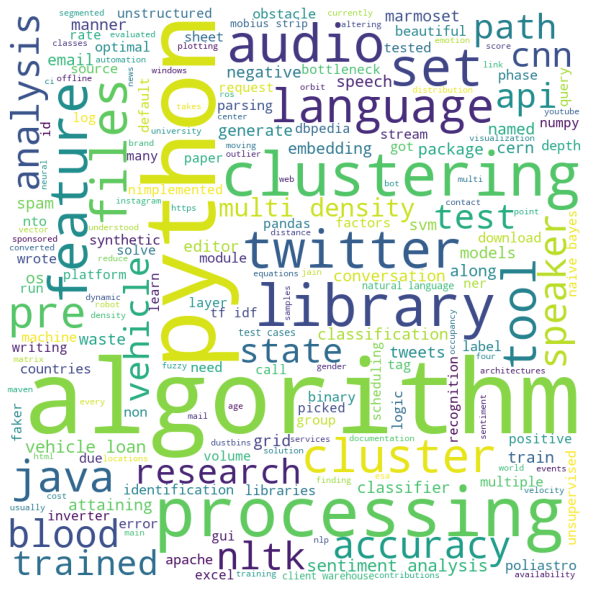

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list7 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 6:
        list7.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list7)

173

In [ ]:
list7

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'heavy loads servers reduced ipfs warni

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
170       models  0.027575
272         time  0.025117
110     generate  0.024153
151     language  0.021943
66      designed  0.021430
249          set  0.020967
94      features  0.019690
271         text  0.019523
160         lstm  0.019242
253       simple  0.019224
155         like  0.018322
43           car  0.016284
269         test  0.015952
191         nthe  0.015886
11      analysis  0.015328
106         game  0.015122
0           able  0.014991
134        image  0.014914
181      network  0.014779
207     platform  0.014656
33          best  0.014473
217  programming  0.014353
184          nlp  0.013828
286   university  0.013710
5             ai  0.013666
93       feature  0.013582
25    autonomous  0.013511
102    framework  0.013435
277      trained  0.013416
279  transaction  0.013369

In [ ]:
list70 = ' '.join(list7)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list70)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 3
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 3
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 2
Frequency of peers is : 1
Frequency of fundamental is : 1
Frequency of analysis is : 10
Frequency of financial is : 4
Frequency of statements is : 2
Frequency of calculated is : 3
Frequency of relevant is : 3
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 2
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 5
Frequency of best is : 9
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of psnr is : 1
Frequency of currently is : 3
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of algorithm is : 3
Frequency of reconstruction is : 5
Frequency of k is : 7
Frequency of space is : 6
Frequency of superresolution is : 1
Frequency of images is :

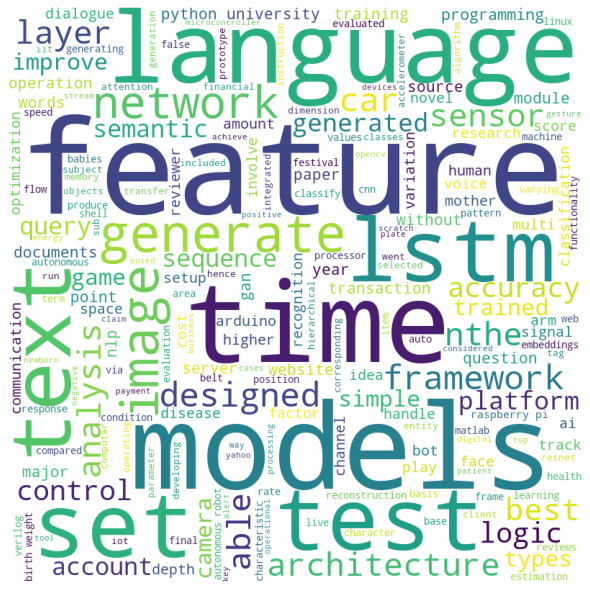

In [ ]:
list70 = ' '.join(list7)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list70) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list8 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 7:
        list8.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list8)

37

In [ ]:
list8

['analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'players elaborate manual workflow evaluate nevaluation players multi million dollar industry generate four times revenue compared calculate entire game digitalized cameras iot devices cloud gpus tensorflow computer vision fr cnn models step game enabled valuation fraud models',
 'optimize ambulance provision smart cities reduces trip time city map openstreetmap platform simulation urban mo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list8)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2                analysis  0.113267
4               analytics  0.092887
19                    map  0.089464
9                  engine  0.072487
16               handling  0.070175
34               solution  0.069607
11                 entire  0.068476
7                  coding  0.060700
21                 models  0.059591
30                   road  0.055754
1              algorithms  0.055659
14                finding  0.051154
12               features  0.048264
15              framework  0.045969
0               algorithm  0.045811
27                 python  0.044104
35                   text  0.043796
5               automated  0.042622
25             predictive  0.042596
6          classification  0.040907
32                 server  0.039343
28         recommendation  0.036193
29  recommendation engine  0.036193
31           segmentation  0.035816
33                    set  0.035195
17                  later  0.034579
26              processes  0.034579
38                vehicle  0.034228
37                   time  0.032820
13              financial  0.031641

In [ ]:
list80 = ' '.join(list8)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list80)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyzing is : 1
Frequency of millions is : 1
Frequency of financial is : 4
Frequency of fraudulent is : 1
Frequency of hand is : 2
Frequency of audit is : 2
Frequency of analytics is : 11
Frequency of platform is : 3
Frequency of leveraged is : 1
Frequency of collect is : 1
Frequency of erps is : 4
Frequency of rules is : 2
Frequency of features is : 4
Frequency of extraction is : 1
Frequency of engine is : 8
Frequency of customizable is : 1
Frequency of client is : 2
Frequency of predictive is : 3
Frequency of models is : 5
Frequency of clients is : 2
Frequency of many is : 2
Frequency of sap is : 1
Frequency of oracle is : 1
Frequency of maintain is : 1
Frequency of though is : 2
Frequency of captured is : 1
Frequency of analysis is : 14
Frequency of remains is : 1
Frequency of transform is : 2
Frequency of interface is : 1
Frequency of conducting is : 1
Frequency of exploratory is : 1
Frequency of visualization is : 2
Frequency of tools is : 2
Frequency of anomaly is :

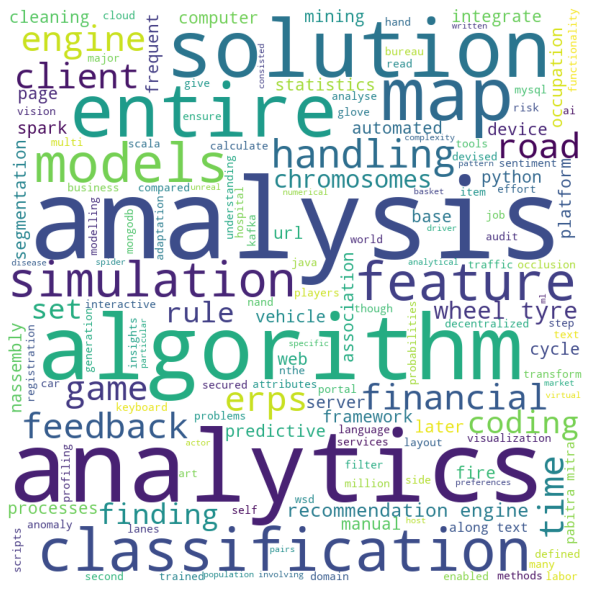

In [ ]:
list80 = ' '.join(list8)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list80) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list9 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 8:
        list9.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list9)

69

In [ ]:
list9

['american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'cbir inria holidays colour histogram image ndescriptor extract features images indexed images image descriptor stored csv chi squared distance metric similarity images returned top nresults matching query image introducing deep neural network extract features nunderstanding rather image composition',
 'works network embedding consider network structure generated could potenti

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list9)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
43                 image  0.161541
45                images  0.129278
58               network  0.115311
62                neural  0.103024
63        neural network  0.087876
91               trained  0.080811
61              networks  0.055596
1               accuracy  0.051212
23         convolutional  0.046546
26                  deep  0.044154
17                   cnn  0.043827
86            tensorflow  0.043655
24  convolutional neural  0.043255
12        classification  0.043019
31                  face  0.041795
64       neural networks  0.041760
79            resolution  0.034913
73            processing  0.034671
10                 class  0.032750
74                python  0.032645
42                 human  0.031149
14              classify  0.031046
83                 state  0.030461
28           deep neural  0.030287
36              generate  0.029758
75           recognition  0.029031
68                opencv  0.028799
7           architecture  0.028527
93        trained neural  0.027172
49                 keras  0.026916

In [ ]:
list90 = ' '.join(list9)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list90)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of american is : 1
Frequency of sign is : 2
Frequency of language is : 6
Frequency of primary is : 1
Frequency of north is : 1
Frequency of america is : 1
Frequency of deaf is : 1
Frequency of individuals is : 2
Frequency of also is : 9
Frequency of hard is : 1
Frequency of hearing is : 1
Frequency of employs is : 1
Frequency of signs is : 2
Frequency of hand is : 2
Frequency of along is : 1
Frequency of facial is : 5
Frequency of gestures is : 3
Frequency of bodily is : 1
Frequency of pastures is : 1
Frequency of images is : 52
Frequency of contained is : 1
Frequency of encoded is : 1
Frequency of alphabetic is : 1
Frequency of letters is : 2
Frequency of trained is : 27
Frequency of convolutional is : 15
Frequency of neural is : 50
Frequency of network is : 56
Frequency of classify is : 9
Frequency of asl is : 1
Frequency of loading is : 1
Frequency of examining is : 1
Frequency of preprocessing is : 2
Frequency of tested is : 1
Frequency of designing is : 2
Frequency of so

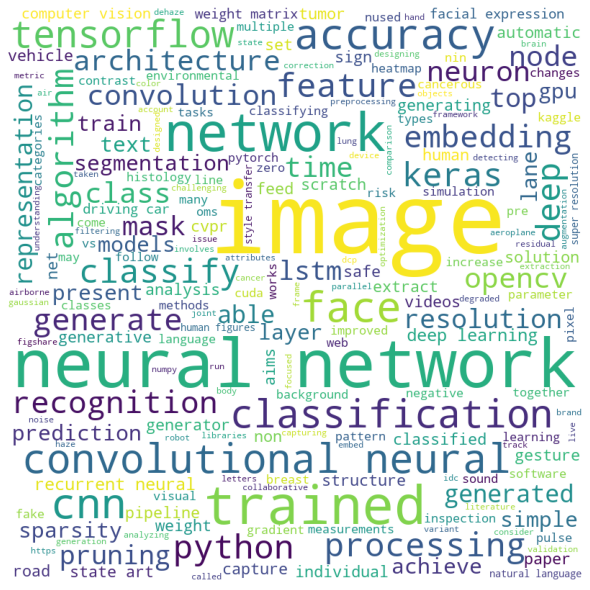

In [ ]:
list90 = ' '.join(list9)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list90) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list11 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 9:
        list11.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list11)

36

In [ ]:
list11

['end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'taken kaggle com movie scripts script words associated genre cleaning visualization predicting genre movie words script algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com movie genre classifier',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'dial

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list11)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
14                   end  0.189612
52               website  0.151260
43              software  0.121156
27                  like  0.093914
10                   css  0.090608
20                  html  0.087202
21              html css  0.079655
25            javascript  0.076317
26              language  0.073773
24                  java  0.073200
32                 mysql  0.069811
35                   php  0.066774
15               end end  0.066149
17           engineering  0.065815
42                server  0.058797
36             php mysql  0.057951
12              database  0.054310
9                 course  0.048089
18              features  0.047918
11        css javascript  0.042826
53          website like  0.042393
37              platform  0.042298
45                 state  0.042110
40                python  0.037677
50                   web  0.036282
19             framework  0.035817
39            principles  0.035304
13                django  0.032299
0               accuracy  0.030707
44  software engineering  0.029375

In [ ]:
list110 = ' '.join(list11)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list110)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of end is : 25
Frequency of pipeline is : 1
Frequency of abnormalities is : 1
Frequency of chest is : 3
Frequency of x is : 4
Frequency of ray is : 3
Frequency of top is : 1
Frequency of chexpert is : 2
Frequency of competition is : 1
Frequency of nhttps is : 1
Frequency of stanfordmlgroup is : 1
Frequency of io is : 1
Frequency of competitions is : 1
Frequency of stanford is : 1
Frequency of datasets is : 1
Frequency of images is : 1
Frequency of multiple is : 1
Frequency of image is : 2
Frequency of processing is : 1
Frequency of balancing is : 2
Frequency of adaptive is : 1
Frequency of histogram is : 1
Frequency of equalization is : 1
Frequency of augmentation is : 1
Frequency of classification is : 1
Frequency of densenet is : 1
Frequency of architecture is : 3
Frequency of improving is : 1
Frequency of accuracy is : 4
Frequency of disease is : 1
Frequency of ensemble is : 1
Frequency of models is : 1
Frequency of reviews is : 3
Frequency of cleaning is : 3
Frequency of 

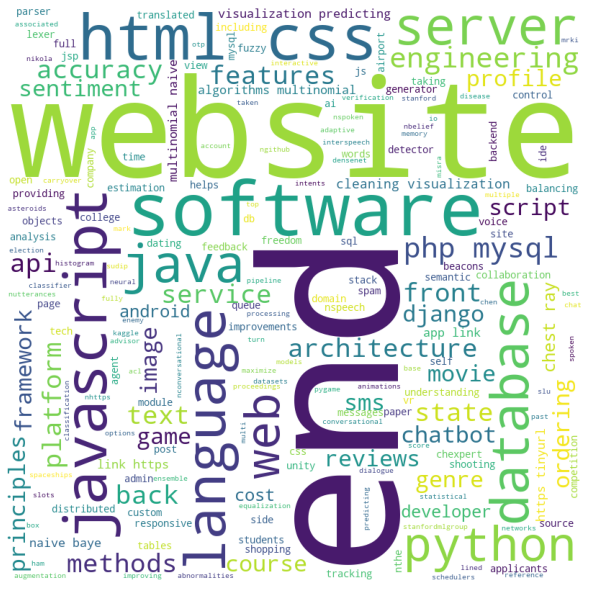

In [ ]:
list110 = ' '.join(list11)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list110) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 